# Advanced MLP
- Advanced techniques for training neural networks
  - Weight Initialization
  - Nonlinearity (Activation function)
  - Optimizers
  - Batch Normalization
  - Dropout (Regularization)
  - Model Ensemble

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

Using TensorFlow backend.


## Load Dataset
- MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


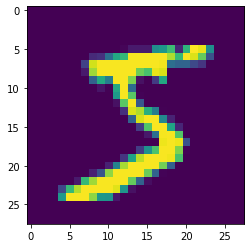

Label:  5


In [4]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

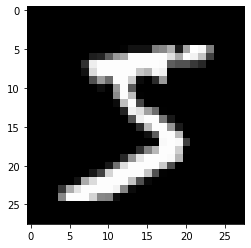

In [6]:
a = X_train[0]
plt.imshow(a, cmap="gray")

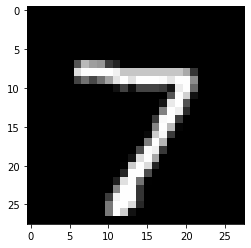

Label:  7


In [9]:
plt.imshow(X_test[0], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test[0] )

In [16]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [17]:
print(X_train.shape)

(60000, 784)


In [19]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

print(X_train.shape)
print(y_train)

(19800, 784)
[6 9 2 ... 5 5 3]


In [20]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_test.shape)

(10000, 10)


In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


# Basic MLP model

In [22]:
model = Sequential()

In [140]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [141]:
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [122]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 1, verbose = 0)

In [38]:
print(history.history)

{'val_loss': [2.3027642484465836, 2.3026148230941206, 2.302478640649455, 2.30236275332544, 2.3022689527132694, 2.3022001409370088, 2.3021443749116326, 2.3021006545635183, 2.3020577893112644, 2.30201817746917, 2.3019986340493865, 2.3020005690128316, 2.301982657275216, 2.3019582740385522, 2.3019625671784887, 2.3019607921240706, 2.301951701231677, 2.301950475423023, 2.3019597777613887, 2.301950462097271, 2.301949540693752, 2.301937978917902, 2.3019463797611017, 2.3019512441423204, 2.3019472049944327, 2.3019330737566706, 2.3019355041812166, 2.30194576035445, 2.301948310229112, 2.3019478659838537, 2.301948731354993, 2.301947353343771, 2.301965855267714, 2.3019630878461332, 2.3019611188458273, 2.301945938726868, 2.30194232439754, 2.30195481688888, 2.301947396853155, 2.3019514244413535, 2.3019511706098563, 2.3019565087777596, 2.301970117581814, 2.301962927776555, 2.3019757635264284, 2.3019993794887554, 2.30200633151764, 2.3020088995345915, 2.3020144905706847, 2.302034254106207, 2.302036914440

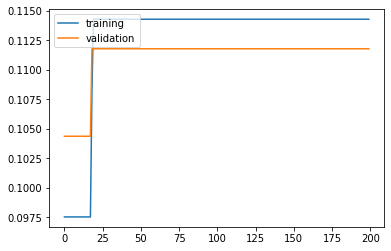

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [19]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 41us/step


In [20]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 1. Weight Initialization



- Xavier
- Uniform distribution : sqrt( 6 / (fan_in + fan_out))
- Normal distribution  : N(0, sqrt(2. / (fan_in + fan_out)))

- HE
- Uniform distribution : limit is sqrt( 6 / fan_in)
- Normal distribution : N(0, sqrt(2 / fan_in))

In [145]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [146]:
model = mlp_model()
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

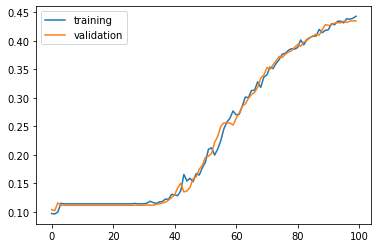

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [54]:
results = model.evaluate(X_test, y_test)
print(results)

10000/10000 [==============================] - 0s 19us/step
[0.4430935901008525, 0.9271000027656555]


In [55]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9271000027656555


## 2. Nonlinearity (Activation function)

In [56]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [57]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

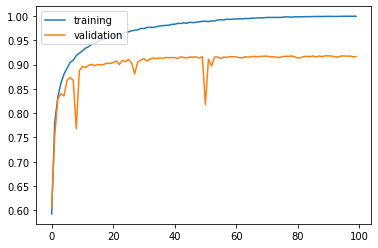

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [59]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 20us/step


In [60]:
print('Test accuracy: ', results[1])

Test accuracy:  0.921999990940094


## 3. Optimizers


In [61]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [62]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

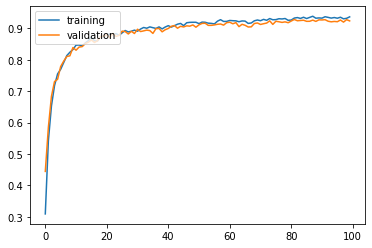

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [64]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 19us/step


In [65]:
print('Test accuracy: ', results[1])

Test accuracy:  0.919700026512146


## 4. Batch Normalization

비선형 변환 전에 추가

In [148]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))        
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [149]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

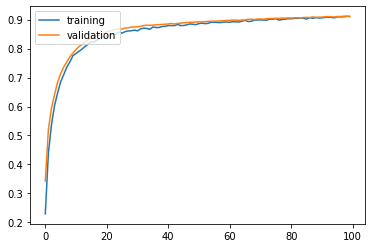

In [150]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [151]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 24us/step


In [42]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9121999740600586


## 5. Dropout (Regularization)

In [156]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.1))                #   Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.1))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.1))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.1))                         # Dropout layer after Activation
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [153]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

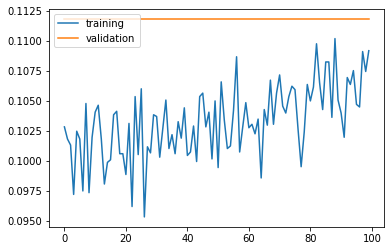

In [155]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [35]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 40us/step


In [36]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 6. Model Ensemble

In [157]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [163]:
print(np.max([1,2,3,4,1, 8, 2.4]))
print(np.argmax([1,2,3,4,1, 8, 2.4]))   


label = [0,0,2,1]

x =np.array([0.21, 0.4, 0.9])
np.argmax(x)



8.0
5
[0 0 2 1]


In [165]:
print(y_train)
print(y_test)

[6 9 2 ... 5 5 3]
[7 2 1 ... 4 5 6]


In [183]:
def mlp_model():    
    model = Sequential()    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))        
    
    model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [184]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)

In [185]:
ensemble_clf = VotingClassifier(estimators = [
    ('model1', model1), 
    ('model2', model2), 
    ('model3', model3)], voting = 'soft')

In [186]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001EF347F4A88>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001EF347F4088>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001EF347F4548>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [187]:
y_pred = ensemble_clf.predict(X_test)

In [188]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.9679


# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [189]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [190]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [191]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 100)

In [192]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')

In [ ]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.7579 - accuracy: 0.7679
Epoch 2/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.4241 - accuracy: 0.8784
Epoch 3/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.3636 - accuracy: 0.8972
Epoch 4/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.3210 - accuracy: 0.9080
Epoch 5/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.2915 - accuracy: 0.9170
Epoch 6/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.2731 - accuracy: 0.9216
Epoch 7/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.2610 - accuracy: 0.9252 0s - loss: 0.2614 - 
Epoch 8/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.2546 - accuracy: 0.9266
Epoch 9/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.2449 - accuracy: 0.9308
Epoch 10/100
60000/60000 

60000/60000 [==============================] - 4s 67us/step - loss: 0.1458 - accuracy: 0.9560
Epoch 78/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1488 - accuracy: 0.9565 0s - loss: 0.1487 - accuracy
Epoch 79/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1511 - accuracy: 0.9565
Epoch 80/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1491 - accuracy: 0.9560
Epoch 81/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1460 - accuracy: 0.9568
Epoch 82/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1486 - accuracy: 0.9564
Epoch 83/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1492 - accuracy: 0.9558
Epoch 84/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1493 - accuracy: 0.9564
Epoch 85/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1492 - accuracy: 0.9571
Epoch 86/100
60000/60

Epoch 28/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1789 - accuracy: 0.9480
Epoch 29/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1795 - accuracy: 0.9481
Epoch 30/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1773 - accuracy: 0.9493
Epoch 31/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1763 - accuracy: 0.9484
Epoch 32/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1739 - accuracy: 0.9492
Epoch 33/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1791 - accuracy: 0.9484
Epoch 34/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1745 - accuracy: 0.9501
Epoch 35/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1730 - accuracy: 0.9492
Epoch 36/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1765 - accuracy: 0.9490
Epoch 37/100
60000/60000 [===========

In [71]:
y_pred = ensemble_clf.predict(X_test)

In [72]:
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.9583
